In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [14]:
# Lets load And read the file

df = pd.read_csv(r"C:\Users\abhilash\OneDrive\Desktop\TCS INTERNSHIP\drugEffects.csv.xls").drop(columns=['Unnamed: 0'])
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [15]:
df[['urlDrugName','condition']].head(15)

,urlDrugName,condition
0,enalapril,management of congestive heart failure
1,ortho-tri-cyclen,birth prevention
2,ponstel,menstrual cramps
3,prilosec,acid reflux
4,lyrica,fibromyalgia
5,propecia,hair loss
6,vyvanse,add
7,elavil,depression
8,xanax,panic disorder
9,claritin,allergies


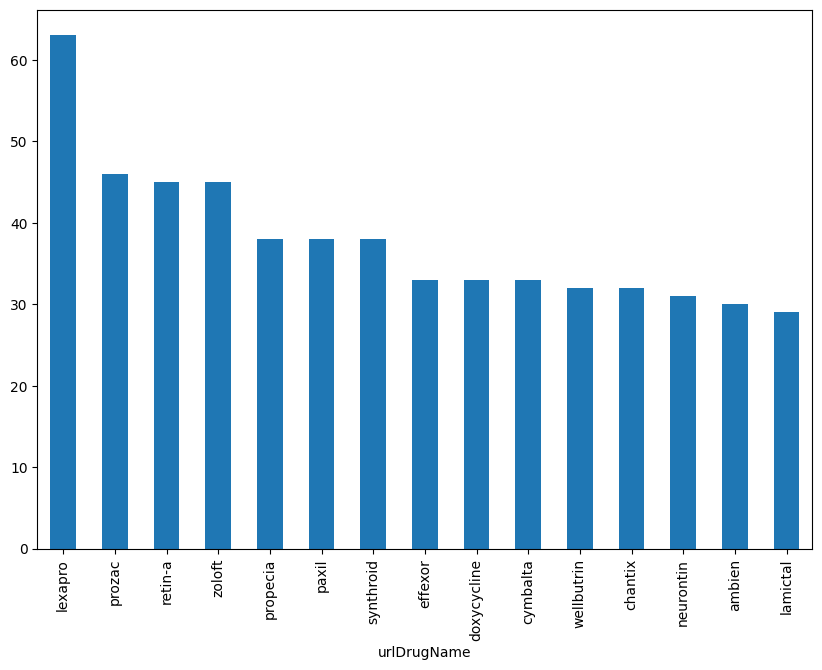

In [16]:
# Check the list of drugs available (top 10)

df['urlDrugName'].value_counts().head(15).plot(kind = 'bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

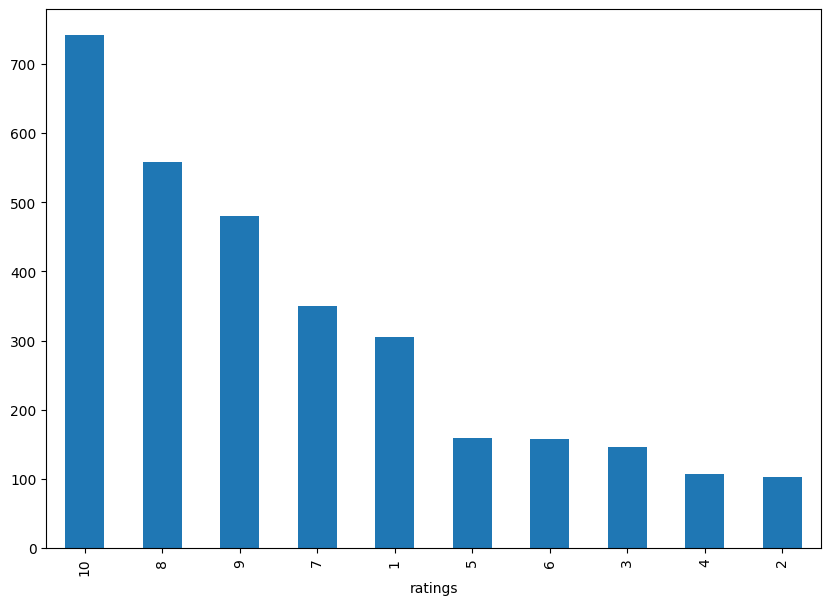

In [17]:
# lets check the Ratings of the drugs

df['rating'].value_counts().plot(kind = 'bar')
plt.xlabel('ratings')
plt.show()

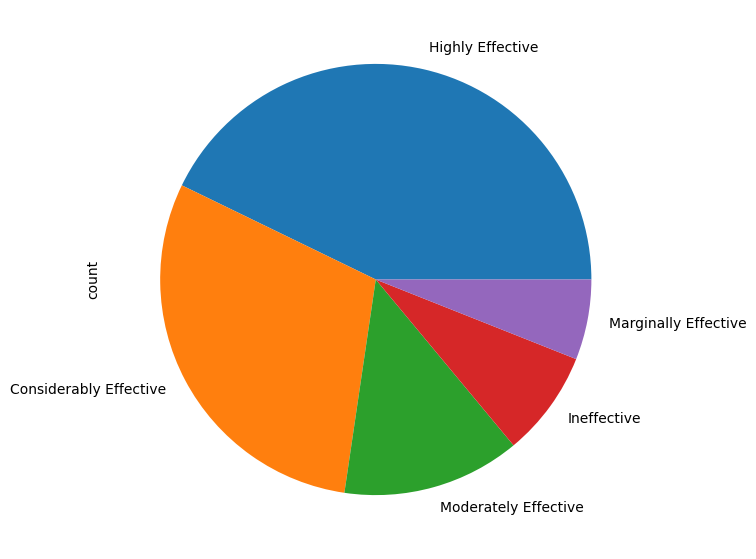

In [18]:
# Checks the effectiveness of the Drugs

df['effectiveness'].value_counts().plot(kind = 'pie')
plt.show()

In [19]:
df['condition'].value_counts()

condition
depression                                          236
acne                                                165
anxiety                                              63
insomnia                                             54
birth control                                        49
                                                   ... 
panic attacks, depression                             1
extrinsic aging                                       1
all over and various type pain                        1
excessive coughing, later diagnosed as pneumonia      1
total hysterctomy                                     1
Name: count, Length: 1426, dtype: int64

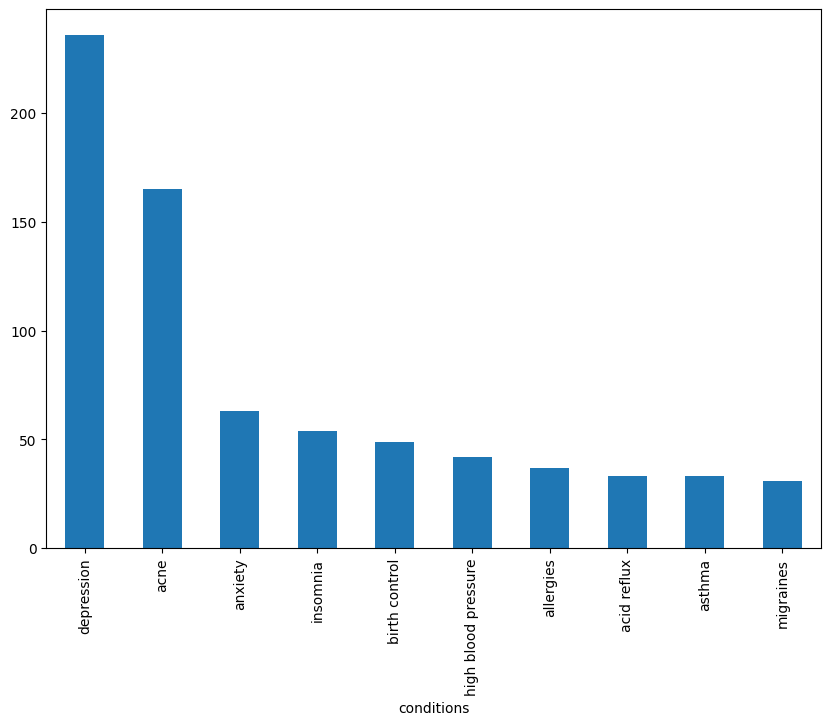

In [20]:
# Checks the various conditions the medicines cures top(10) since they are over Thousands

df['condition'].value_counts().head(10).plot(kind='bar')
plt.xlabel('conditions')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

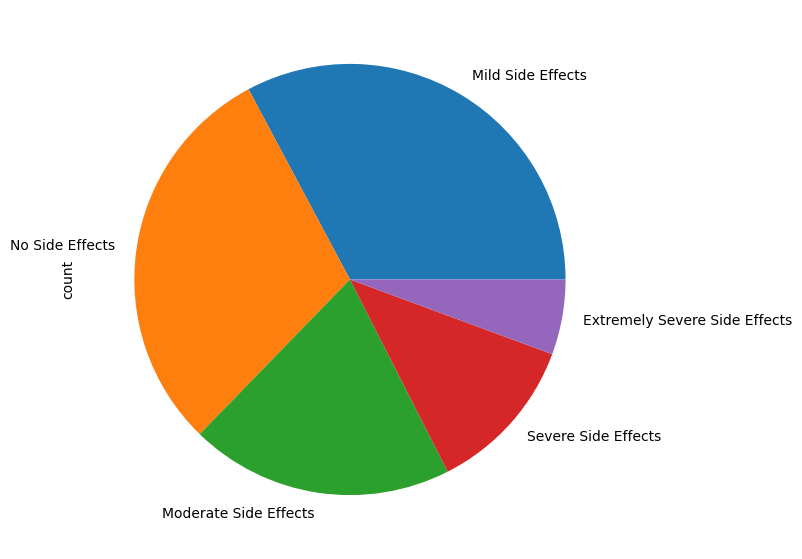

In [21]:
# Check the sideEffects of Drugs

df['sideEffects'].value_counts().plot(kind = 'pie')
plt.show

In [22]:
target = df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [23]:
# Lets Convert Catagorical Data into the numeric 

cols = ['urlDrugName','effectiveness','condition']

for x in cols:
    df[x] = pd.factorize(df[x])[0]

target = pd.factorize(target)[0]
df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [26]:
target

array([0, 1, 2, ..., 4, 0, 4], dtype=int64)

In [24]:
# scaling the data before modeling

scaler = StandardScaler()
df = scaler.fit_transform(df)

df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])

In [28]:
# Split the data into training and validation

x_train, x_test, y_train, y_test = train_test_split(df, target,test_size = .3)

In [34]:
# using SVM

svm_clf = SVC().fit(x_train, y_train)

svm_pred = svm_clf.predict(x_test)

print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.46      0.54      0.50       300
           1       0.37      0.49      0.42       105
           2       0.59      0.59      0.59       294
           3       0.47      0.14      0.22        57
           4       0.44      0.34      0.38       177

    accuracy                           0.49       933
   macro avg       0.47      0.42      0.42       933
weighted avg       0.49      0.49      0.48       933



In [35]:
# using Random Forest

rf_clf = RandomForestClassifier().fit(x_train, y_train)

rf_pred = rf_clf.predict(x_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.44      0.47      0.45       300
           1       0.34      0.36      0.35       105
           2       0.52      0.52      0.52       294
           3       0.37      0.32      0.34        57
           4       0.38      0.33      0.35       177

    accuracy                           0.44       933
   macro avg       0.41      0.40      0.40       933
weighted avg       0.44      0.44      0.44       933



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Train KNN model (k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train, y_train)

# Make predictions
knn_pred = knn_clf.predict(x_test)

# Print classification report
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.56      0.48       300
           1       0.36      0.40      0.38       105
           2       0.52      0.49      0.50       294
           3       0.38      0.26      0.31        57
           4       0.41      0.25      0.31       177

    accuracy                           0.44       933
   macro avg       0.42      0.39      0.40       933
weighted avg       0.44      0.44      0.43       933

